# HeartDieseasePred

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1=pd.read_csv('labels.csv')
d1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [3]:
d2=pd.read_csv('values.csv')
d2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
data=pd.concat([d2,d1],axis=1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0


In [5]:
# there are 16 columns and 180 rows 

## Domain Analysis

- slope_of_peak_exercise_st_segment While a high ST depression is considered normal & healthy. The “ slope ” hue, refers to the peak exercise ST segment, with values: 1: upsloping, 2: flat, 3: down-sloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.


- thal A blood disorder called thalassemia,[normal, reversible defect, fixed defect]


- resting_blood_pressure blood pressure tells a lot about your general health. High blood pressure or hypertension can lead to several heart related issues and other medical conditions. Uncontrolled high blood pressure can lead to stroke.


- chest_pain_type Most of the chest pain causes are not dangerous to health, but some are serious, while the least cases are life-threatening.[TA: typical angina(1), ATA: Atypical angina(2), NAP: non-anginal pain(3), ASY: asymptomatic (4) ]


- num_major_vessels Major Blood Vessels of the Heart: Blood exits the right ventricle through the pulmonary trunk artery. Approximately two inches superior to the base of the heart, this vessel branches into the left and right pulmonary arteries, which transport blood into the lungs.[number of major vessels: 0 to 3]


- fasting_blood_sugar_gt_120_mg_per_dl (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


- resting_ekg_results The electrocardiogram (ECG or EKG) is a test that measures the heart’s electrical activity, and a resting ECG is administered when the patient is at rest. It involves noninvasive recording with adhesive skin electrodes placed on specially prepared spots on the skin, and it plots out the heart's activity on a graph. It is used to determine the health of the heart and circulatory system and to help diagnose issues with associated body systems.[0: normal, 1:having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2:showing probable or definite left ventricular hypertrophy by Estes’ criteria]


- serum_cholesterol_mg_per_dl A person’s serum cholesterol level represents the amount of total cholesterol in their blood. A person’s serum cholesterol level comprises the amount of high-density lipoprotein (HDL), low-density lipoprotein (LDL), and triglycerides in the blood. Triglycerides are a type of fat bundled with cholesterol.


- oldpeak_eq_st_depression oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms


- sex: sex (1 = male; 0 = female)


- age: Age in years


- max_heart_rate_achieved It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.[Average heart rate: 60 to 100 bpm]


- exercise_induced_angina Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.[0: no, 1: yes]


## Basic checks

In [7]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


In [8]:
data.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,2nx10r,0


In [9]:
data.describe()  # no constant values

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [10]:
data.describe(include='all')

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
count,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180,180.000000
unique,180,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,NaN
top,0z64un,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0z64un,NaN
freq,1,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,NaN,1.550000,NaN,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,NaN,0.444444
std,NaN,0.618838,NaN,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,NaN,0.498290
min,NaN,1.000000,NaN,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,NaN,0.000000
25%,NaN,1.000000,NaN,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,NaN,0.000000
50%,NaN,1.000000,NaN,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,NaN,0.000000
75%,NaN,2.000000,NaN,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,NaN,1.000000


In [11]:
data.isnull().sum()  # no null values

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
patient_id                              0
heart_disease_present                   0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

 Insights from the data
-  No constant values present in the data  

-  NO null values present in the data

-  No unique values

-  In thal most of the patience has normal thal


## EDA

In [6]:
# dropping patient_id as it is a duplicate column and also it is a unique column 
data.drop('patient_id',axis=1,inplace=True)


### Univariate analysis

In [15]:
import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


- slope_of_peak_exercise_st_segment : It has 3 distinct values i.e 1,2,3 where   1: upsloping, 2: flat, 3: down-sloping.The slope of the peak exercise ST      segment is upsloping for 52% (1)of the patient, then 42% of the patience has flat and 7% of the patience has down-sloping ST segment.


- thal : with 3 distinct values. 54% of the patient has normal thal, 41% has reversible_defect and 4% of the patient have fixed_defect.


- resting_blood_pressure :It is a numerical data with a postive skew of 0.657 and  with a kurtosis of 0.473 and 20% distinct values, in a range between 94 to 180.


- chest_pain_type : 4 types of chest pain are seen [TA: typical angina(1), ATA: Atypical angina(2), NAP: non-anginal pain(3), ASY: asymptomatic (4) ]. 46% of the people have type 4 i.e asymptomatic, 32% of the patient  have type 3 non-anginal pain, 16% has type 2 (Atypical angina) and 7% has type 1 (typical angina). People with asymptomatic chest pain are more than other chest pain. 


- num_major_vessels : 4 distinct values. 59% of the patient have 0 major blood vessels, 21% has 1, 13% has 2 and 8% has 3 major vessels which  transport blood into the lungs   


- fasting_blood_sugar_gt_120_mg_per_dl : Have 2 distinct values . 
 84% of the values belong to 0 that means fasting blood sugar is less than 120  mg per dl and 16% of the patient have  fasting blood sugar higher than 120 mg per dl.


- resting_ekg_results :resting_ekg_results have 3 distinct values 0,1,2 [0:     normal, 1:having ST-T wave abnormality , 2:showing probable or definite left ventricular hypertrophy by Estes’ criteria]
52% of the patient are showing probable or definite left ventricular  hypertrophy by Estes’ criteria (2). 47% showing normal resting_ekg_result and less than 1% of the patient result shows ST-T wave abnormality


- serum_cholesterol_mg_per_dl : It is a numerical data with a skewness of 1.27                                 and a range between 126-564



- oldpeak_eq_st_depression : It consists of 66% distinct values, a numerical                                data with a skewness of 1.51 and a range of 6.20



- sex : It has 2 distinct values with more 60% under males i.e heart disease is         occurs more in males as compared to females



- age : It is a numerical data with 40 distinct values, having a negative skew        of -0.199 and a range of 48.0



- max_heart_rate_achieved : It is a numerical data with 73 distinct values,                                 having a negative skew of -0.394 and a range of                                 106



- exercise_induced_angina : It has 2 distinct values with more 60% patients who                             don't have anginal chest pain



- heart_disease_present : It is the output variable with 56% of pateints having                           no heart disease and 44% having a heart disease

### Bivariate analysis

In [28]:
data.min()

slope_of_peak_exercise_st_segment                  1
thal                                    fixed_defect
resting_blood_pressure                            94
chest_pain_type                                    1
num_major_vessels                                  0
fasting_blood_sugar_gt_120_mg_per_dl               0
resting_ekg_results                                0
serum_cholesterol_mg_per_dl                      126
oldpeak_eq_st_depression                         0.0
sex                                                0
age                                               29
max_heart_rate_achieved                           96
exercise_induced_angina                            0
heart_disease_present                              0
dtype: object

In [27]:
data.max()

slope_of_peak_exercise_st_segment                       3
thal                                    reversible_defect
resting_blood_pressure                                180
chest_pain_type                                         4
num_major_vessels                                       3
fasting_blood_sugar_gt_120_mg_per_dl                    1
resting_ekg_results                                     2
serum_cholesterol_mg_per_dl                           564
oldpeak_eq_st_depression                              6.2
sex                                                     1
age                                                    77
max_heart_rate_achieved                               202
exercise_induced_angina                                 1
heart_disease_present                                   1
dtype: object

In [32]:
data.age.value_counts()

54    12
58    10
44     9
64     9
51     9
57     8
60     7
62     7
41     6
67     6
55     6
59     6
48     6
65     6
63     5
45     5
52     5
49     4
56     4
53     4
66     4
50     4
42     4
61     3
40     3
70     3
46     3
71     3
68     3
43     2
35     2
47     2
69     2
39     2
74     1
38     1
29     1
77     1
37     1
34     1
Name: age, dtype: int64

In [33]:
data.age.sort_values(ascending=True)

18     29
121    34
152    35
65     35
73     37
       ..
42     71
47     71
20     71
38     74
2      77
Name: age, Length: 180, dtype: int64

In [25]:
#Bivariate Analysis on categorical data
d1=data[['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina']]
#Bivariate Analysis on numerical data
d2=data[['resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved','oldpeak_eq_st_depression']]

In [51]:
d1

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,oldpeak_eq_st_depression,sex,exercise_induced_angina
0,1,normal,2,0,0,2,0.0,1,0
1,2,normal,3,0,0,0,1.6,0,0
2,1,normal,4,3,0,2,0.0,1,1
3,1,reversible_defect,4,0,0,0,0.0,1,0
4,3,reversible_defect,1,0,0,2,4.2,1,0
...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,4,2,1,0,0.2,1,0
176,2,normal,4,0,0,1,3.4,0,1
177,2,reversible_defect,3,0,0,0,1.8,1,1
178,1,normal,3,2,1,0,0.0,1,0


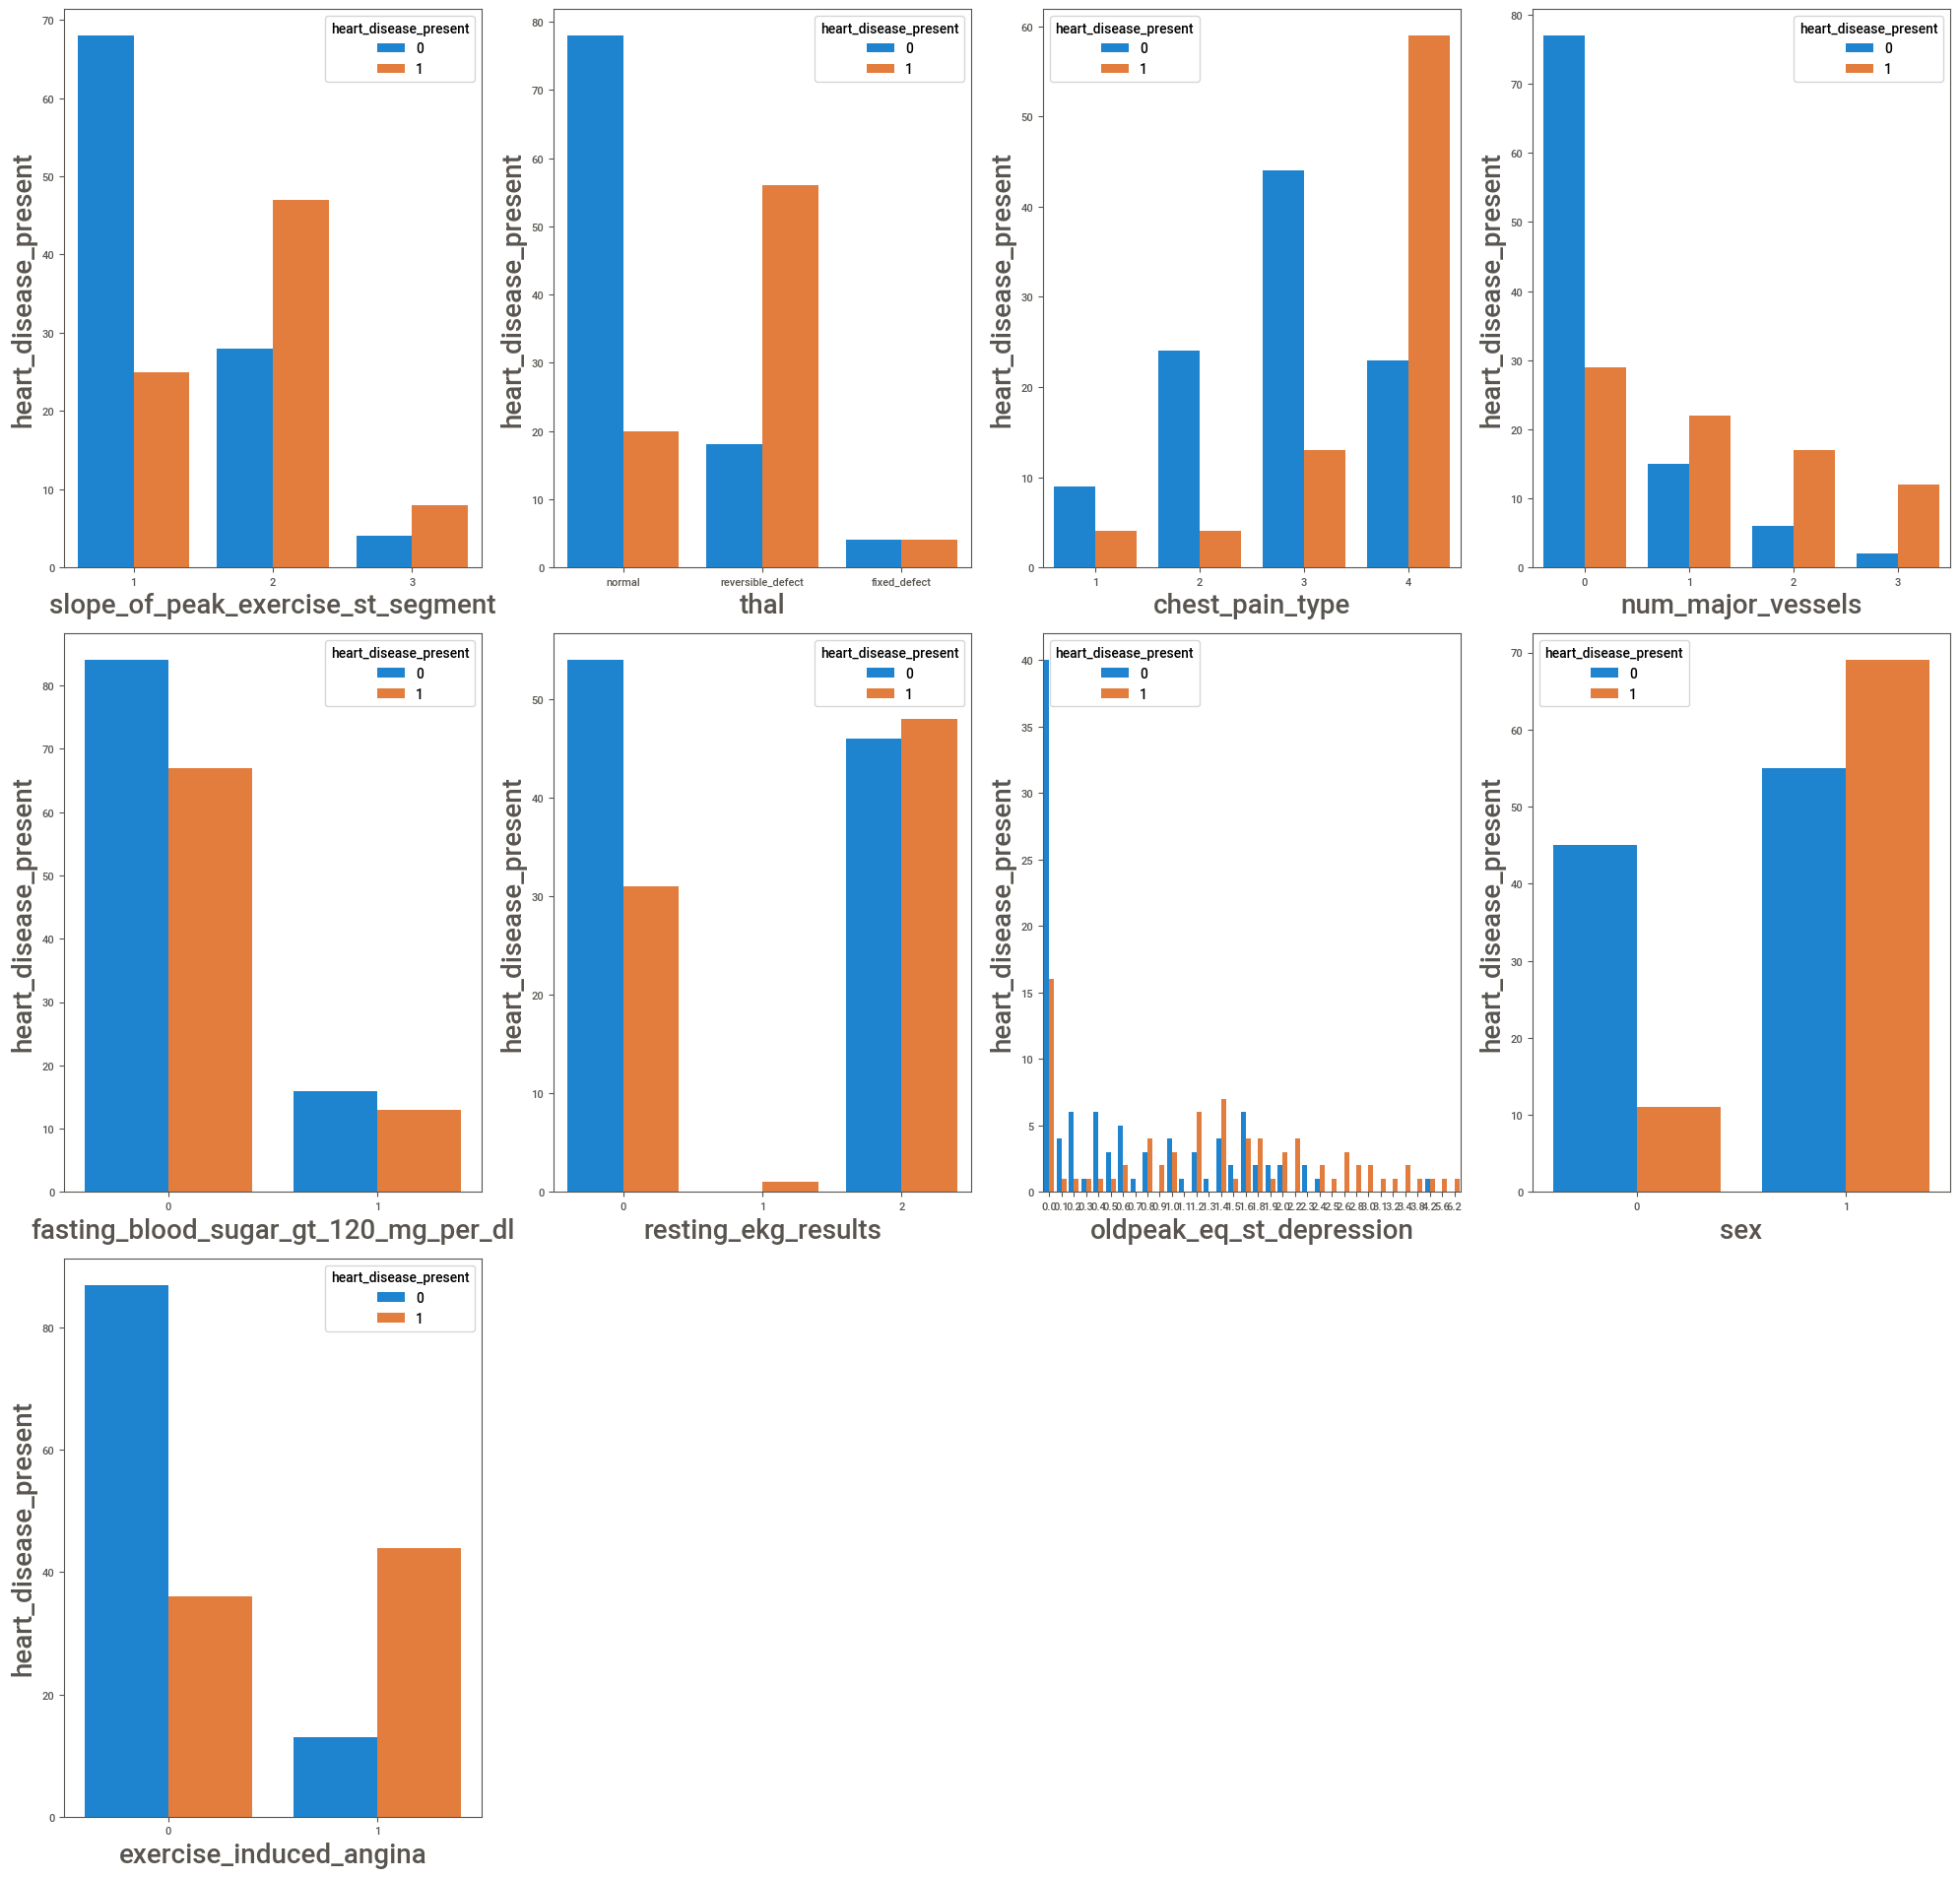

In [53]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1 #counter

for column in d1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=d1[column],hue=data['heart_disease_present'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

 - slope_of_peak_exercise_st_segment : 
   -people performing  more exercise are less likely to get heart disease
   -as compared to flat and downsloping people with upsloping have very low        chances of getting any heart disease
  
- thal:
  -people having fixed defect thal have very low or 50-50 chances  of getting      heart disease
  -whereas patients with reversible thalasemmia have higher risk of getting        heart  disease
  -Patients with normal blood flow have a very low chance of getting heart        disease. 
  
- fasting_blood_sugar_gt_120_mg_per_dl :
  -fasting_blood_sugar_gt_120_mg_per_dl has no direct realtion with the            outcome.
  -Heart disease doesnot depends on fasting sugar level
  
- chest_pain_type :
  -patients having asymptomatic type of chest pain are more likely to get heart    disease
  -whereas people with non-anginal pain are less likely to get a heart disease
  -people with typical angina and atypical angina chest pain are at the least      risk of catching a heart disease
 
- num_major_vessels:
  -patients with low number of major vessles have very low chances of having      heart disease
  -As the number of vessels increases the chances of getting a heart disease      increses i.e they are directly proportional
  
- resting_ekg_results:
  -people with 0 EKG results are less likely to get a heart disease as compared    to people with 2 EKG result
  
- sex:
  -males are more likely to get a heart disease as compared to females
  

- exercise_induced_angina:
  -people having angina induced by exercise have low chances of getting heart      disease
  -every exercise induced angina is not always a heart disease

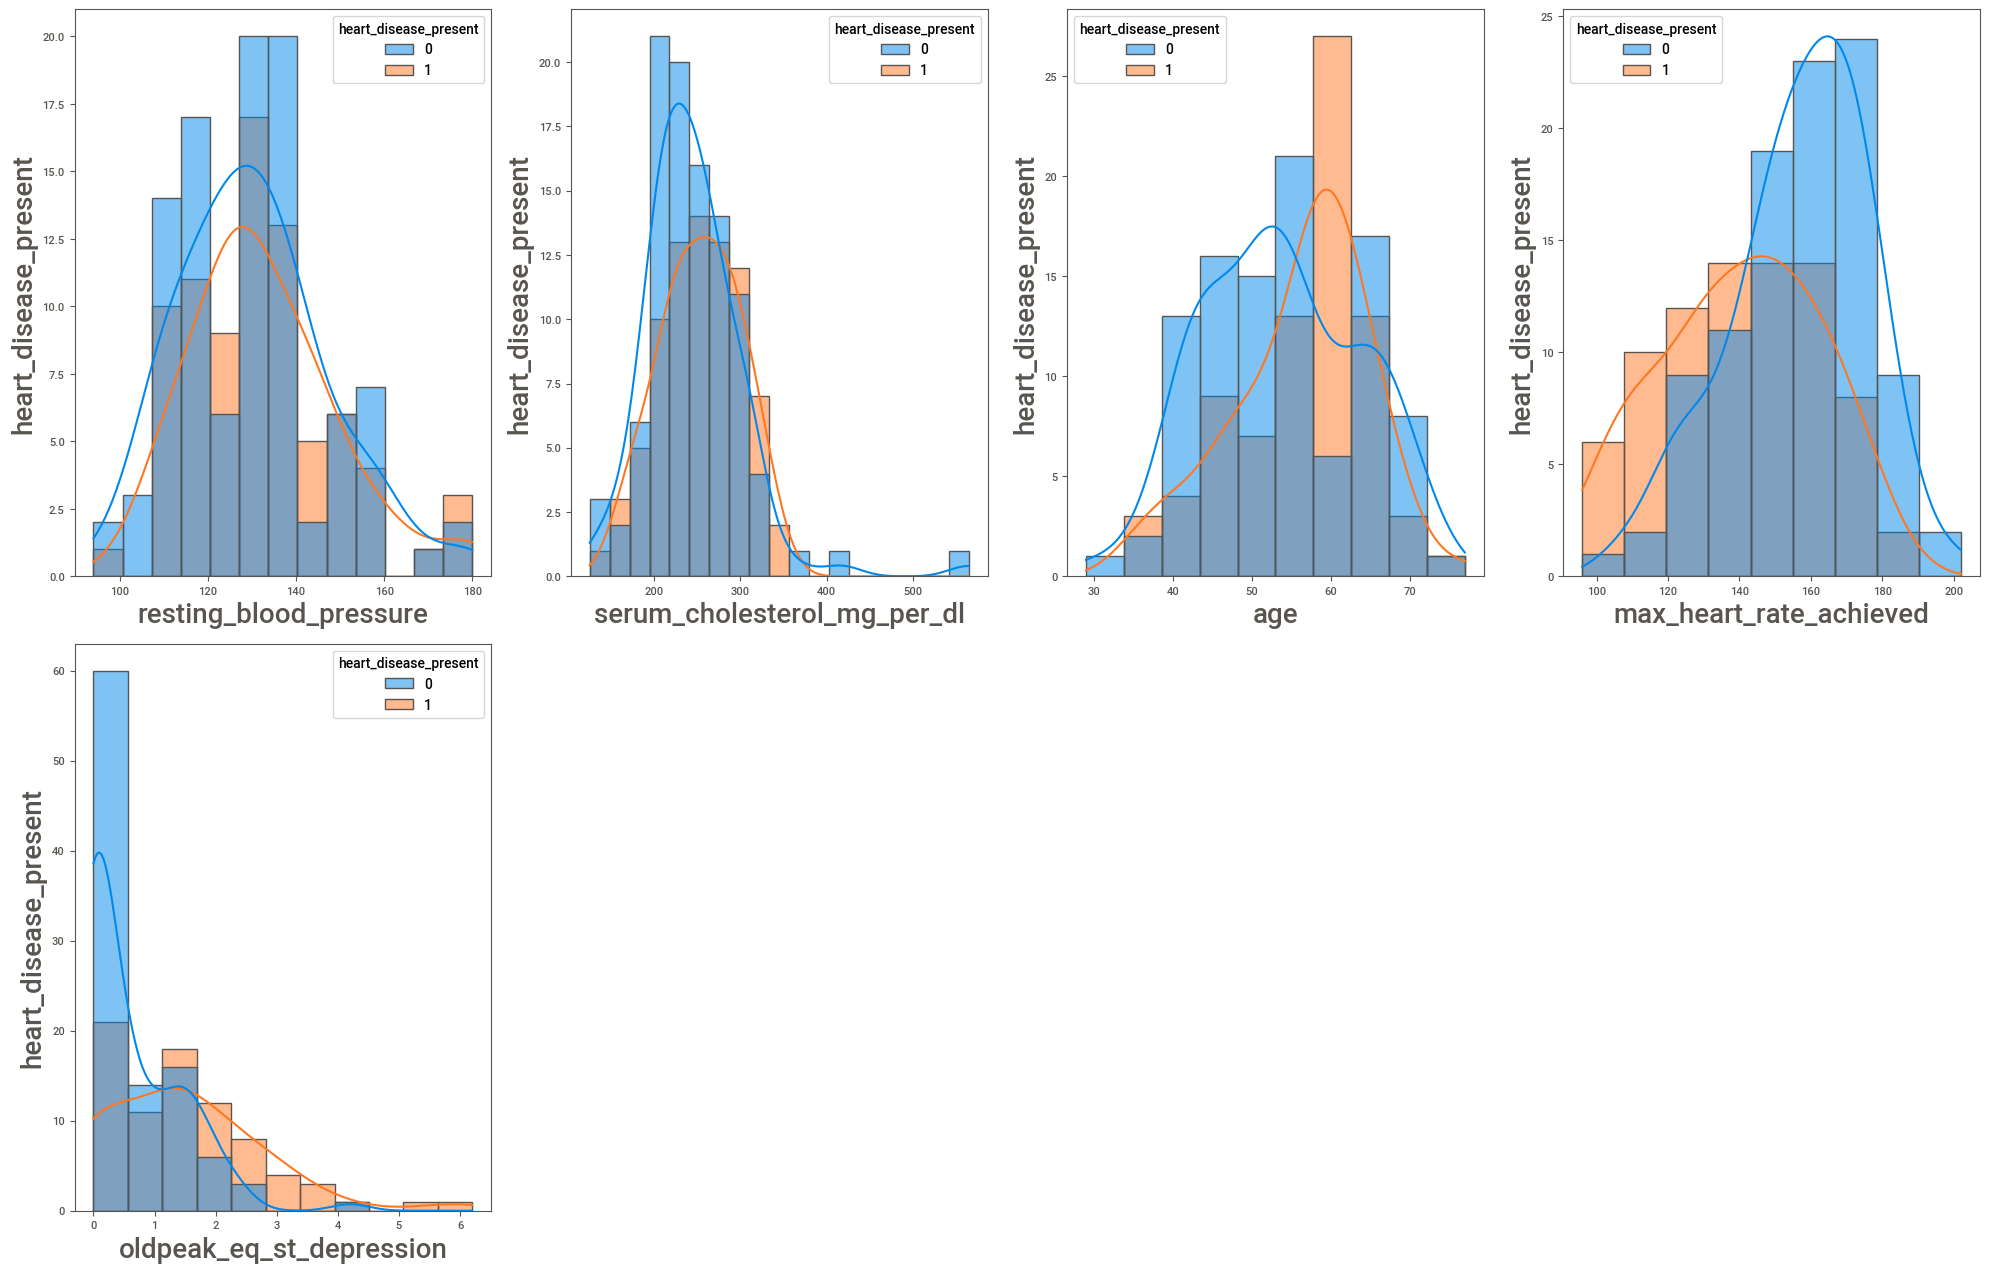

In [56]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in d2:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=d2[column],hue=data['heart_disease_present'],kde=True)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('heart_disease_present',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

- resting_blood_pressure and serum_cholesterol_mg_per_dl donot have a direct relationship with the heart disease as per the above graph

- age: people with age between 55-65 are more likely to get a heart disease

- max_heart_rate_achieved: people having heart rate between 100-140 are having   high chances of getting heart disease
 people having heart disease more than 140 are less likely to have a have         disease
 
- oldpeak_eq_st_depression : people having more St depression have  more chances of getting heart disease
people with oldpeak more than one have more chances of getting heart disease as compared to people having oldpeak from 0-1

### Data Preprocessing Pipeline

In [5]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
patient_id                              0
heart_disease_present                   0
dtype: int64

There are no null values

### Converting categorical to numerical data

In [12]:
len(data.head(2).columns)

14

In [13]:
data.head(2).columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [16]:
data.head(2)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0


In [17]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [7]:
data.thal=data.thal.map({'normal':0,'reversible_defect':1,'fixed_defect':2})
data.head(2)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0


In [11]:
data.thal.value_counts()

0    98
1    74
2     8
Name: thal, dtype: int64

## Feature Selection

In [22]:
data.head(2)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0


<AxesSubplot:>

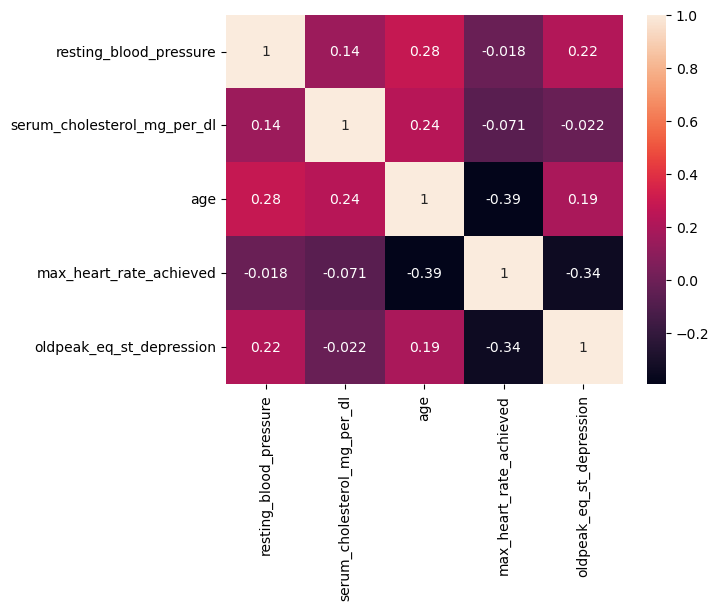

In [26]:
sns.heatmap(d2.corr(),annot=True)

<AxesSubplot:>

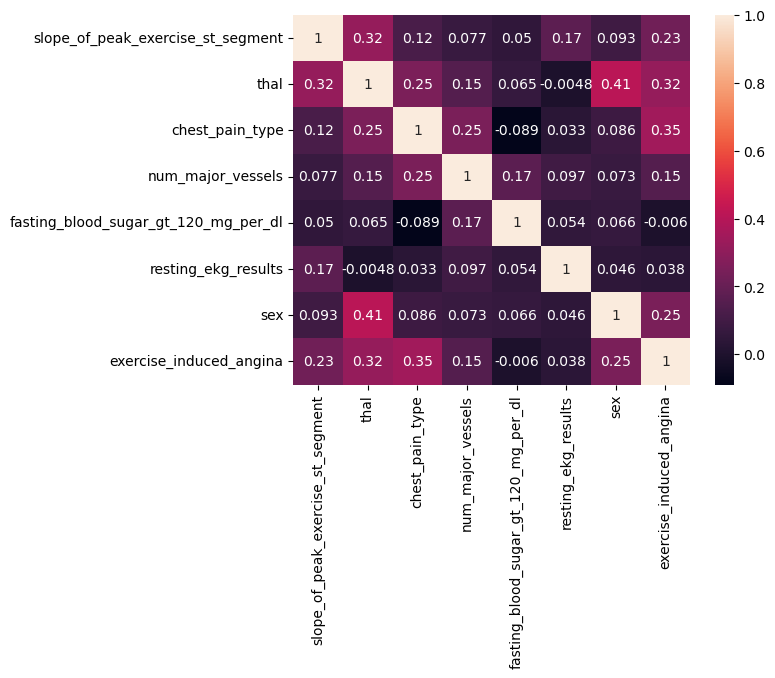

In [27]:
sns.heatmap(d1.corr(),annot=True)

In [30]:
data.head(2)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0


In [8]:
## Scaling the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina','resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved','oldpeak_eq_st_depression']]=scale.fit_transform(data[['slope_of_peak_exercise_st_segment','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','sex','exercise_induced_angina','resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved','oldpeak_eq_st_depression']])


In [9]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0.0,0,0.395349,0.333333,0.0,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0,0
1,0.5,0,0.186047,0.666667,0.0,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0,0
2,0.0,0,0.360465,1.000000,1.0,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0,1
3,0.0,1,0.674419,1.000000,0.0,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0,1
4,1.0,1,0.976744,0.000000,0.0,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0,0


### Handling outliers

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


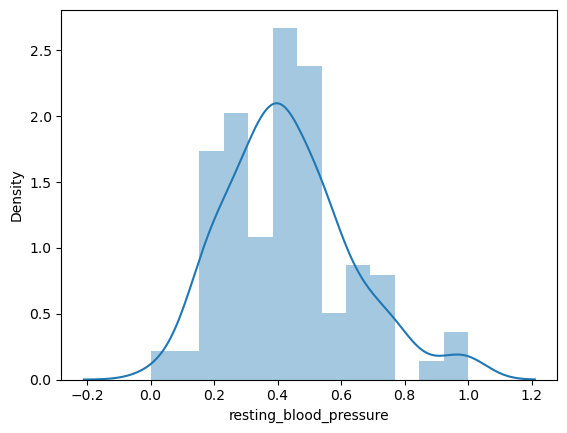

In [67]:
#esting_blood_pressure
sns.distplot(data.resting_blood_pressure)
plt.show()

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


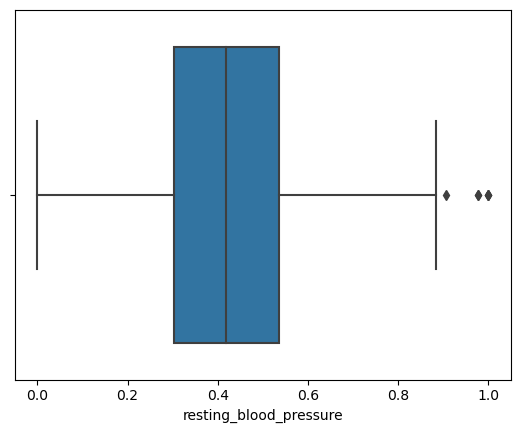

In [73]:
sns.boxplot(data.resting_blood_pressure)
plt.show()
#ouliters in max_limit

In [10]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.resting_blood_pressure,interpolation='midpoint')
IQR

0.2325581395348837

In [11]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR

In [12]:
data.loc[data['resting_blood_pressure']<min_limit]
data.loc[data['resting_blood_pressure']>max_limit]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


C:\Users\sahir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


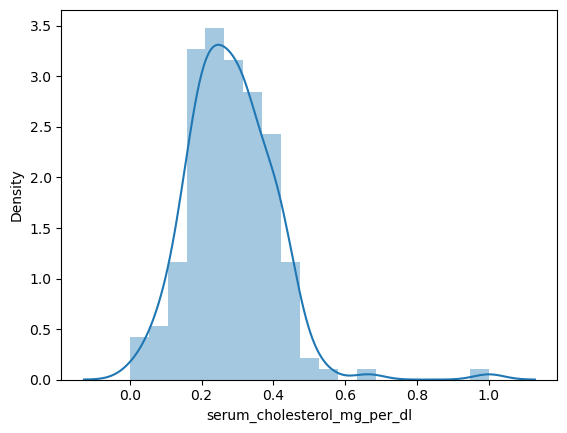

In [77]:
# serum_cholesterol_mg_per_dl

sns.distplot(data.serum_cholesterol_mg_per_dl)
plt.show()

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


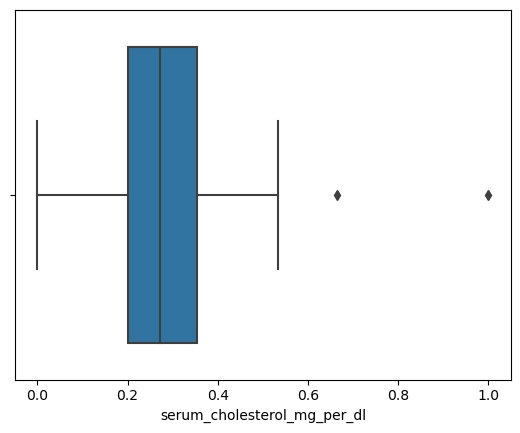

In [78]:
sns.boxplot(data.serum_cholesterol_mg_per_dl)
plt.show()
#ouliters in max_limit

In [13]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.serum_cholesterol_mg_per_dl,interpolation='midpoint')
IQR

0.15525114155251138

In [14]:
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR

In [15]:
data.loc[data['serum_cholesterol_mg_per_dl']<min_limit]
data.loc[data['serum_cholesterol_mg_per_dl']>max_limit]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
60,0.5,1,0.244186,0.666667,0.0,0.0,1.0,1.0,0.258065,0.0,0.791667,0.603774,0.0,0


In [16]:
len(data.loc[data['serum_cholesterol_mg_per_dl']>max_limit])

1

In [17]:
data.shape[0]
len(data.loc[data['serum_cholesterol_mg_per_dl']>max_limit]) #### wrong
1/180*100

0.5555555555555556

In [18]:
data.loc[data['serum_cholesterol_mg_per_dl']>max_limit,'serum_cholesterol_mg_per_dl']=np.median(data.serum_cholesterol_mg_per_dl)

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


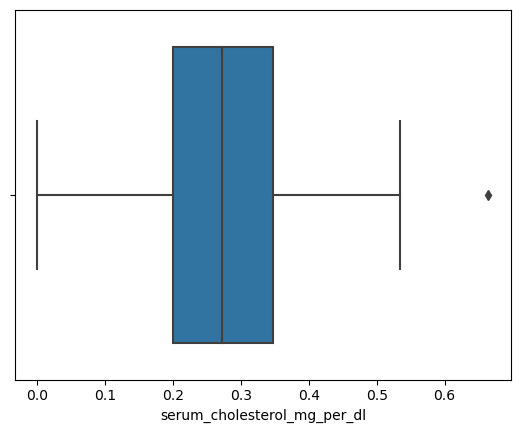

In [19]:
sns.boxplot(data.serum_cholesterol_mg_per_dl)
plt.show()

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


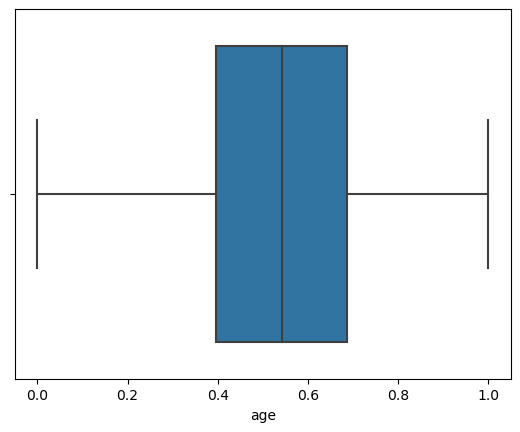

In [88]:
sns.boxplot(data.age)
plt.show()

C:\Users\sahir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


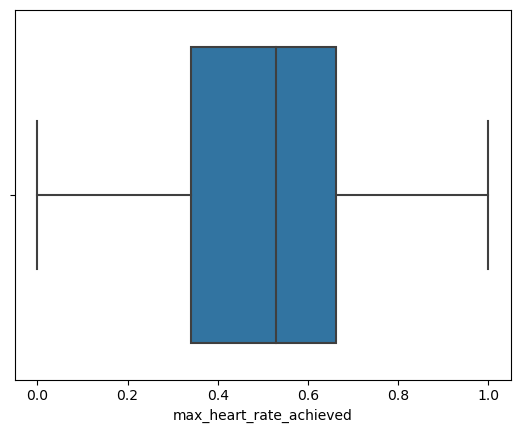

In [89]:
sns.boxplot(data.max_heart_rate_achieved)
plt.show()

## Model Creation

In [20]:
X = data.iloc[:,:-1]
y=data.heart_disease_present

In [21]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0.0,0,0.395349,0.333333,0.000000,0.0,1.0,0.415525,0.000000,1.0,0.333333,0.698113,0.0
1,0.5,0,0.186047,0.666667,0.000000,0.0,0.0,0.200913,0.258065,0.0,0.520833,0.584906,0.0
2,0.0,0,0.360465,1.000000,1.000000,0.0,1.0,0.406393,0.000000,1.0,1.000000,0.622642,1.0
3,0.0,1,0.674419,1.000000,0.000000,0.0,0.0,0.221461,0.000000,1.0,0.229167,0.801887,0.0
4,1.0,1,0.976744,0.000000,0.000000,0.0,1.0,0.328767,0.677419,1.0,0.625000,0.462264,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,1,0.360465,1.000000,0.666667,1.0,0.0,0.292237,0.032258,1.0,0.791667,0.632075,0.0
176,0.5,0,1.000000,1.000000,0.000000,0.0,0.5,0.458904,0.548387,0.0,0.541667,0.198113,1.0
177,0.5,1,0.360465,0.666667,0.000000,0.0,0.0,0.417808,0.290323,1.0,0.729167,0.330189,1.0
178,0.0,0,0.348837,0.666667,0.666667,1.0,0.0,0.294521,0.000000,1.0,0.395833,0.745283,0.0


In [22]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45)

## Logistic 

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [21]:
y_pred_prob=clf.predict_proba(X_test)

In [22]:
pd.crosstab(y_pred,y_test)

heart_disease_present,0,1
row_0,,
0,23,7
1,5,10


In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [98]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[23  7]
 [ 5 10]]


In [99]:
recall=recall_score(y_test,y_pred)
recall

0.5882352941176471

In [100]:
precision=precision_score(y_test,y_pred)
precision

0.6666666666666666

In [101]:
f1score=f1_score(y_test,y_pred)
f1score

0.625

In [102]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7333333333333333

In [103]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.67      0.59      0.62        17

    accuracy                           0.73        45
   macro avg       0.72      0.70      0.71        45
weighted avg       0.73      0.73      0.73        45



In [117]:
from sklearn.model_selection import cross_val_score
scores_after = cross_val_score(clf,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good.

[0.76595745 0.88888889 0.71428571]
Cross validation Score: 0.7897106833277047
Std : 0.0732335502768562


## SVM

In [104]:
from sklearn.model_selection import train_test_split
Xs_train,Xs_test,ys_train,ys_test=train_test_split(X, y,random_state=3)

In [105]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(Xs_train, ys_train)
ys_hat=svclassifier.predict(Xs_test)

In [106]:
acc=accuracy_score(ys_test,ys_hat)
acc

0.8444444444444444

In [107]:
recall=recall=recall_score(ys_test,ys_hat)
recall

0.8333333333333334

In [108]:
precision=precision_score(ys_test,ys_hat)
precision

0.7894736842105263

In [109]:
f1score=f1_score(ys_test,ys_hat)
f1score

0.8108108108108109

In [110]:
cr=classification_report(ys_test,ys_hat)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.79      0.83      0.81        18

    accuracy                           0.84        45
   macro avg       0.84      0.84      0.84        45
weighted avg       0.85      0.84      0.85        45



In [112]:
cm=confusion_matrix(ys_hat,ys_test)
print(cm)

[[23  3]
 [ 4 15]]


In [118]:
from sklearn.model_selection import cross_val_score
scores_after = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good.

[0.75       0.90196078 0.6779661 ]
Cross validation Score: 0.7766422953362137
Std : 0.09336581596409513


## KNN

In [24]:
from sklearn.model_selection import train_test_split
Xk_train,Xk_test,yk_train,yk_test=train_test_split(X, y,random_state=40)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xk_train,yk_train)
    pred_i = knn.predict(Xk_test)
    error_rate.append(np.mean(pred_i != yk_test)) 

C:\Users\sahir\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sahir\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [27]:
error_rate

[0.37777777777777777,
 0.4222222222222222,
 0.4,
 0.37777777777777777,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4]

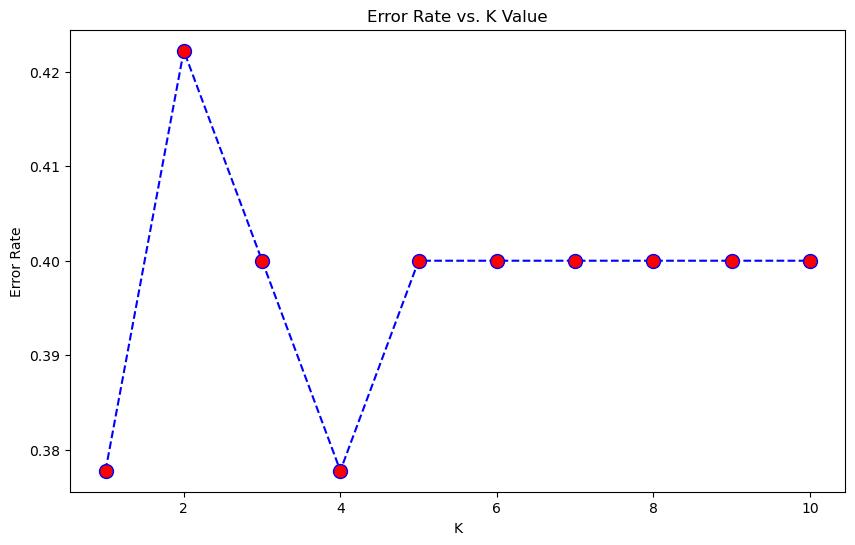

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [27]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(Xk_train,yk_train)

KNeighborsClassifier()

In [28]:
yk_pred = knn1.predict(Xk_test)

C:\Users\sahir\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
print("The accuracy score is : ", accuracy_score(yk_test,yk_pred),'\n')
print('The recall score is : ',recall_score(yk_test,yk_pred),'\n')
print('The precisiion score is : ',precision_score(yk_test,yk_pred),'\n')
print('The f1 score is : ',f1_score(yk_test,yk_pred),'\n')
print('The confusion matrix  is : ',confusion_matrix(yk_test,yk_pred),'\n')
print('The classification report : ',classification_report(yk_test,yk_pred),'\n')


The accuracy score is :  0.6 

The recall score is :  0.5454545454545454 

The precisiion score is :  0.6 

The f1 score is :  0.5714285714285713 

The confusion matrix  is :  [[15  8]
 [10 12]] 

The classification report :                precision    recall  f1-score   support

           0       0.60      0.65      0.63        23
           1       0.60      0.55      0.57        22

    accuracy                           0.60        45
   macro avg       0.60      0.60      0.60        45
weighted avg       0.60      0.60      0.60        45
 



## Conclusion



Men seem to be more susceptible to heart disease than women. Increasing age,  systolic blood pressure also show increasing chances of heart disease.


The Logistic model predicted with an accuracy of 0.76 whereas SVM model predicted with an accuracy score of 0.84 also KNN has an accuracy score of 0.6 The model is more specific than sensitive.

The general model can be improved with more data.

Case 1 = if the person has a heart disease and the model predicted it as                false(FN)

Case 2 = if the person doesnot have a heart disease and the model predicted it          as True(FP)

In case 1 it would be more dangerous for a person to not receive the treatment even after having a disease 
hence we need to select a model with high recall score

                     precision     recall  f1-score   
     SVM                0.88       0.85      0.87        
     Logistic           0.66       0.58      0.62
     KNN                0.60       0.54      0.57
  
Result:
As the recall score of SVM is higher than logistic regression 
SVM is a better model for further predictions
